In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals import  joblib
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

### Leitura dos dados

In [2]:
df_wine = pd.read_csv('dados/winequality-red.csv', delimiter=';')
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Total de vinhos para cada nota

Total de vinhos por nota: 
3 -> 10  vinhos
4 -> 53  vinhos
5 -> 681  vinhos
6 -> 638  vinhos
7 -> 199  vinhos
8 -> 18  vinhos

Total de vinhos:  1599


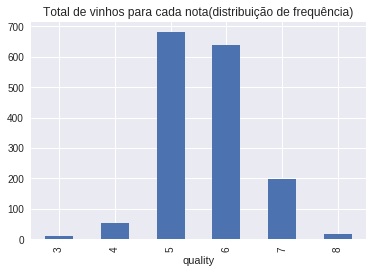

In [3]:
# Obtém o total de vinhos para cada nota
s_wine = df_wine.groupby('quality').count().alcohol

print ('Total de vinhos por nota: ')

for  nota, total in s_wine.iteritems():
    print(nota, '->', total, ' vinhos')
print('\nTotal de vinhos: ', df_wine.shape[0])
s_wine.plot(kind='bar', title='Total de vinhos para cada nota(distribuição de frequência)')

### Matriz de correlação

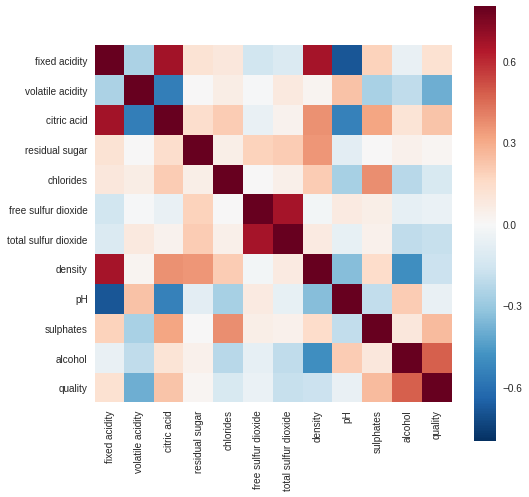

In [4]:
corr_mat = df_wine.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_mat, vmax=.8, square=True)

### Média aritmética das notas

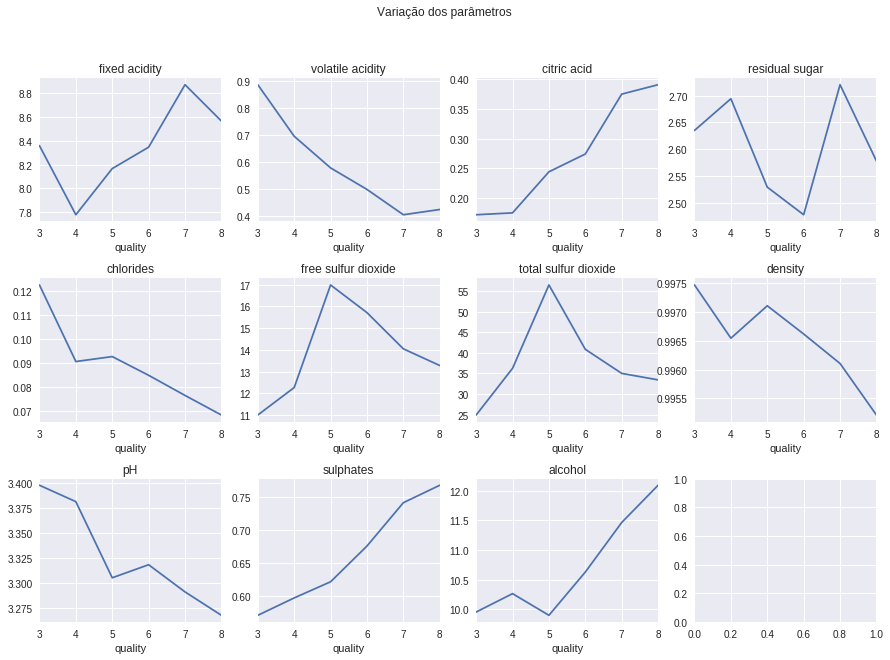

In [5]:
df = df_wine.groupby('quality').mean()

# Definindo gráficos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle("Variação dos parâmetros")

# Aumentando espaço entre gráficos
fig.subplots_adjust(hspace=0.4)

# Plota gráfico com média dos elementos, agrupado pela nota
for i, column in enumerate(df.columns):
    ax = axes[int(i/4)][i % 4]
    
    ax.set_title(column)
    
    df[column].plot(ax=ax)

### Descrição dos dados

In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Redes neurais
    
<p>A história das Redes Neurais começa com o trabalho dos pesquisadores Warren McCulloch e Walter Pitts, McCuloch era psiquiatra e neuroanatomista e passou cerca de 20 anos refletindo e estudando sobre a representação do sistema nervoso, em 1942 ele convidou Pitts, que era matemático, para fazer parte das suas pesquisas. Os dois foram os primeiros a descreverem um modelo artificial para um neurônio biológico em 1943</p>

<p>O modelo é formado por um vetor de entradas e as sinapses são representadas por pesos numéricos, a soma ponderada das entradas é submetida à uma função de transferência, ou função de ativação, que determina se a soma é maior que um valor numérico - o limiar do neurônio - se sim, o neurônio é ativado (valor 1) caso contrário, é desativado (valor 0). É muito simples: tudo o que o neurônio faz é responder se a soma recebida é maior que um valor numérico. <a href="http://redesneuraisartificiais.blogspot.com.br/2010/10/o-primeiro-modelo-de-um-neuronio-criado.html">mais</a></p>

<img src='dados/modelo_neuro.png'/>

Uma rede neural artificial é composta por várias unidades de processamento, cujo funcionamento é bastante simples. Essas unidades, geralmente são conectadas por canais de comunicação que estão associados a determinado peso. As unidades fazem operações apenas sobre seus dados locais, que são entradas recebidas pelas suas conexões. O comportamento inteligente de uma Rede Neural Artificial vem das interações entre as unidades de processamento da rede. <a href="http://conteudo.icmc.usp.br/pessoas/andre/research/neural/">mais</a>
<img src='dados/camadas.gif'/>

### Obtém dados de treino e teste

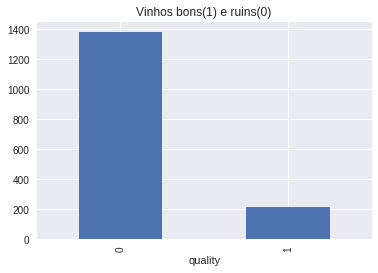

In [7]:
# classifica as notas(0 a 6 = 0; 7 a 9 = 1)
df_wine['quality'] = df_wine['quality'].apply(lambda x: 0 if x < 7 else 1)

df_wine.groupby('quality').count().alcohol.plot(kind='bar', title='Vinhos bons(1) e ruins(0)')

In [8]:
X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Redes neurais e a classificação de vinhos

In [9]:
# Cria a rede neural
classificador = MLPClassifier(
    hidden_layer_sizes=(10, 10, 10),
    random_state=1,
)

# Treina o classificador
classificador.fit(X_train, y_train)

# Classifica os dados de teste
preds = classificador.predict(X_test)

# Exibe taxa de acerto
print ('\nTaxa de acerto: ', accuracy_score(y_test, preds))

# Exibe total de acerto
print ('\nTotal de acertos: {0} em {1}'.format( 
    accuracy_score(y_test, preds, normalize=False), y_test.count())
)

# Exibe precisão do classificador usando técnica de validação cruzada, 
# computando a pontuação 5 vezes consecutivas
score = cross_val_score(classificador, X, y, cv=5, scoring='accuracy')
print ('\ncross_val_score : %f (+/- %.2f)' % (score.mean(), score.std()))


Taxa de acerto:  0.9

Total de acertos: 288 em 320

cross_val_score : 0.861163 (+/- 0.01)


In [10]:
classificador.predict_proba(X_test[0:10])

array([[ 0.98261508,  0.01738492],
       [ 0.67351858,  0.32648142],
       [ 0.87191364,  0.12808636],
       [ 0.81038265,  0.18961735],
       [ 0.82804847,  0.17195153],
       [ 0.96714547,  0.03285453],
       [ 0.80386999,  0.19613001],
       [ 0.98530843,  0.01469157],
       [ 0.80185615,  0.19814385],
       [ 0.97635278,  0.02364722]])

### Salvando modelo

In [11]:
joblib.dump(classificador, 'model.pk1')

['model.pk1']